In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten,TimeDistributed,LSTM,Masking,Bidirectional,GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import csv
from sklearn.model_selection import train_test_split
import scispacy
import spacy
nlp = spacy.load("en_core_sci_md", disable = ['parser','tagger','ner'])

In [3]:
file_name = 'C:/Users/Helen/Documents/python_crap/text_files/NounPhrases.tsv'
n = 2
tuple_sent = []
with open(file_name, newline='', encoding="ISO-8859-1")as f:
    reader = csv.reader(f, delimiter = '\t')
    for line in reader:
        try:
            senten = ([tuple(line[i:i + n]) for i in range(0, len(line), n)])
            senten = [(item[0], int(item[1])) for item in senten]
            tuple_sent.append(senten)
        except Exception:
             print(line)

In [ ]:
#print(tuple_sent)

In [4]:
sents = []
sent = []
for s in tuple_sent:
    for token in s:
        if token[1] == 9:
            new_token = (token[0],4)
        elif token[1] == 999:
            new_token = (token[0],9)    
        else:
            new_token = (token[0],token[1])
        sent.append(new_token)
    sents.append(sent)
    sent = []

In [ ]:
print(sents)

In [ ]:
# def remove_article(sent):
#     no_art_sent= []
#     change_class = False
#     for item in sent:
#         if item[0]  in ['a','the','A','The','an','An']:
#             if item[1] == 1:
#                 change_class = True
#             else:
#                 change_class = False
#         else:
#             if change_class:
#                 item = (item[0],1)
#                 no_art_sent.append(item)
#             else:
#                 no_art_sent.append(item)
#     return no_art_sent


# no_art_set = []
# for i in range(0,len(tuple_sent)):
#     sent = remove_article(tuple_sent[i])
#     no_art_set.append(sent)

In [5]:
X_set = []
y_set = []
X_item = []
y_item = []
for sentences in sents:
    for tups in sentences:
        X_item.append(tups[0])
        y_item.append(tups[1])
    X_set.append(X_item)
    y_set.append(y_item)
    X_item = []
    y_item = []

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.20)

In [ ]:
# print(X_train[50])
# print(y_train[50])

In [6]:
def find_max_list(lst):
    list_len = [len(i) for i in lst]
    return(max(list_len))

max_len = find_max_list(X_set)

In [7]:
print(max_len)

136


In [8]:
w_vecs = np.zeros((len(X_set),250,200))
for i in range(0,len(X_set)):
    for j in range(0,len(X_set[i])):
        w_vecs[i,j] = nlp(X_set[i][j]).vector
print(w_vecs.shape)

(621, 250, 200)


In [ ]:
# y_mset = []
# y_item
# for i in range(len(y_set)):
#     for j in range(len(y_set[i])):
#         if y_set[i][j]==0:
#             item = 1
#             y_item.append(item)
#         elif y_set[i][j]==1:
#             item = 2
#             y_item.append(item)
#         else:
#             item = 3
#             y_item.append(item)
#     y_mset.append(y_item)
#     y_item = []  

In [9]:
y3 = np.array(y_set)
y3 = tf.keras.preprocessing.sequence.pad_sequences(y3, padding="post",value= 0.0, maxlen = 250)
#y_final = np.zeros((len(X_set),max_len,3))
#for i in range(len(y3)):
y3= tf.keras.utils.to_categorical(y3, num_classes=10, dtype='float32')
#print(y3.shape)

In [ ]:
# print(w_vecs[200])
# print(y3[200])
#print(y3.shape)
# #print(y_final.shape)

In [ ]:
# y1 = np.array(y_final)
# y1 = tf.keras.preprocessing.sequence.pad_sequences(y1, padding="post")
# y1 = tf.keras.utils.to_categorical(y_final, num_classes=4, dtype='float32')
# print(y1.shape)

In [ ]:
# # define LSTM configuration
# n_neurons = 27
# n_batch = 3
# n_epoch = 100

In [10]:
###### create LSTM
model = Sequential()
model.add(Masking(mask_value = 0.,input_shape=(250, 200)))
#model.add(Bidirectional(LSTM(134, return_sequences=True),merge_mode='concat'))
model.add(Bidirectional(LSTM(250, return_sequences=True),merge_mode='mul'))
model.add(TimeDistributed(Dense(10, activation = 'softmax')))
#model.add(TimeDistributed(Dense(16, activation = 'relu')))
#model.add(TimeDistributed(Dense(3, activation = 'softmax')))
#model = tf.reduce_max(model, axis=[2], keepdims=True)
#model.add(GlobalMaxPool1D())
#model.add(Dense(28, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dense(28, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dense(4, activation = 'softmax'))
#model.add(TimeDistributed(Dense(4, activation = 'softmax')))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr = 0.01), metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 250, 200)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 250, 250)          902000    
_________________________________________________________________
time_distributed (TimeDistri (None, 250, 10)           2510      
Total params: 904,510
Trainable params: 904,510
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# train the RNN
r = model.fit(w_vecs, y3,epochs=100, validation_split=0.20)

Epoch 1/100
16/16 [==============================] - 39s 2s/step - loss: 0.1556 - accuracy: 0.5613 - val_loss: 0.1231 - val_accuracy: 0.6722
Epoch 2/100
16/16 [==============================] - 35s 2s/step - loss: 0.1098 - accuracy: 0.6660 - val_loss: 0.0951 - val_accuracy: 0.7215
Epoch 3/100
16/16 [==============================] - 35s 2s/step - loss: 0.0858 - accuracy: 0.7164 - val_loss: 0.0816 - val_accuracy: 0.7559
Epoch 4/100
16/16 [==============================] - 36s 2s/step - loss: 0.0707 - accuracy: 0.7622 - val_loss: 0.0738 - val_accuracy: 0.7701
Epoch 5/100
16/16 [==============================] - 37s 2s/step - loss: 0.0600 - accuracy: 0.7971 - val_loss: 0.0643 - val_accuracy: 0.7969
Epoch 6/100
16/16 [==============================] - 39s 2s/step - loss: 0.0531 - accuracy: 0.8156 - val_loss: 0.0618 - val_accuracy: 0.8094
Epoch 7/100
16/16 [==============================] - 39s 2s/step - loss: 0.0476 - accuracy: 0.8332 - val_loss: 0.0623 - val_accuracy: 0.8117
Epoch 8/100
1

16/16 [==============================] - 32s 2s/step - loss: 1.1581e-04 - accuracy: 0.9998 - val_loss: 0.1330 - val_accuracy: 0.7998
Epoch 59/100
16/16 [==============================] - 32s 2s/step - loss: 1.1140e-04 - accuracy: 1.0000 - val_loss: 0.1339 - val_accuracy: 0.7978
Epoch 60/100
16/16 [==============================] - 32s 2s/step - loss: 1.0388e-04 - accuracy: 1.0000 - val_loss: 0.1348 - val_accuracy: 0.7972
Epoch 61/100
16/16 [==============================] - 32s 2s/step - loss: 9.8491e-05 - accuracy: 1.0000 - val_loss: 0.1343 - val_accuracy: 0.7975
Epoch 62/100
16/16 [==============================] - 32s 2s/step - loss: 9.2833e-05 - accuracy: 1.0000 - val_loss: 0.1357 - val_accuracy: 0.7969
Epoch 63/100
16/16 [==============================] - 32s 2s/step - loss: 8.7971e-05 - accuracy: 1.0000 - val_loss: 0.1360 - val_accuracy: 0.7990
Epoch 64/100
16/16 [==============================] - 32s 2s/step - loss: 8.2967e-05 - accuracy: 1.0000 - val_loss: 0.1373 - val_accuracy

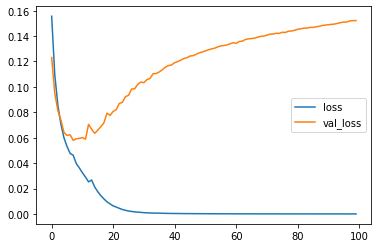

In [12]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

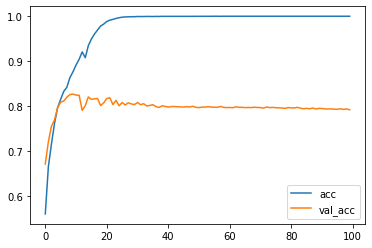

In [13]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:

# output = model.predict(s_zeros)

# for fitem in output:
#     for item in fitem:
#         for i in range(0,4):
#             if item[i]>=0.5:
#                 item[i]=1
#             else:
#                 item[i]=0


# phrase_border = []
# for item in output:
#     for si in item:
#         for i in range(0,4):
#             if si[i] == 1:
#                 phrase_border.append(i)
# print(phrase_border)

# phrase = []
# for item in t_list:
#     if item[1]== 1:
#         phrase.append(item[0])
#     elif item[1] == 2:
#         print(' '.join(phrase))
#         phrase = []
#         phrase.append(item[0])
#     else:
#         phrase.append(item[0])
#         print(' '.join(phrase))
#         phrase = []


# # Plot confusion matrix
# from sklearn.metrics import confusion_matrix
# import itertools

# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#   """
#   This function prints and plots the confusion matrix.
#   Normalization can be applied by setting `normalize=True`.
#   """
#   if normalize:
#       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#       print("Normalized confusion matrix")
#   else:
#       print('Confusion matrix, without normalization')

#   print(cm)

#   plt.imshow(cm, interpolation='nearest', cmap=cmap)
#   plt.title(title)
#   plt.colorbar()
#   tick_marks = np.arange(len(classes))
#   plt.xticks(tick_marks, classes, rotation=45)
#   plt.yticks(tick_marks, classes)

#   fmt = '.2f' if normalize else 'd'
#   thresh = cm.max() / 2.
#   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#       plt.text(j, i, format(cm[i, j], fmt),
#                horizontalalignment="center",
#                color="white" if cm[i, j] > thresh else "black")

#   plt.tight_layout()
#   plt.ylabel('True label')
#   plt.xlabel('Predicted label')
#   plt.show()


# p_test = model.predict(X_test).argmax(axis=1)
# cm = confusion_matrix(y_test, p_test)
# plot_confusion_matrix(cm, list(range(10)))


# # Show some misclassified examples
# misclassified_idx = np.where(p_test != y_test)[0]
# i = np.random.choice(misclassified_idx)
# plt.imshow(x_test[i].reshape(28,28), cmap='gray')
# # plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

# phr_border = phrase_border[0:len(pred_s)]
# senti = [word.text for word in pred_s]
# t_list = list(zip(senti, phr_border))
# print(t_list)

In [14]:
pred_s = 'A total of five RCTs were included in this analysis.'
sent_zeros = np.zeros((1,250,200))
pred_s = nlp(pred_s)
for i in range(0,len(pred_s)):
    sent_zeros[0,i] = pred_s[i].vector


In [21]:
output = model.predict(sent_zeros).argmax(axis=2)

In [30]:
print(len(pred_s))

11


In [32]:
sent_to_write = []
for i in range(0, len(pred_s)):
    sent_to_write.append(pred_s[i])
    sent_to_write.append(output[0][i])
print(sent_to_write)

[A, 4, total, 9, of, 9, five, 9, RCTs, 1, were, 8, included, 9, in, 1, this, 2, analysis, 9, ., 1]


In [25]:
#p_test = model.predict(output).argmax(axis=2)

In [ ]:
vec_test = np.zeros((len(X_test),max_len,200))
for i in range(0,len(X_test)):
    for j in range(0,len(X_test[i])):
        vec_test[i,j] = nlp(X_test[i][j]).vector
print(vec_test.shape)

In [ ]:
p_test = model.predict(vec_test).argmax(axis=2)

In [ ]:
def word_count(X_test):
    words_count = {}
    for i in range(len(X_test)):
        for j in range(len(X_test[i])):
            words_count[X_test[i][j]]=0
    return words_count

def misclassified(y_test,p_test, w_counts):
    for i in range(len(y_test)):
        predicted = p_test[i][0:len(y_test[i])+1]
        for j in range(len(y_test[i])):
            if y_test[i][j] != predicted[j]:
                w_counts[X_test[i][j]] +=1
    misclassified = dict(sorted(w_counts.items(), key=lambda item: item[1],reverse=True))
    return misclassified

In [ ]:
wc = word_count(X_test)
mis = misclassified(y_test,p_test, wc)

In [ ]:
model_path = 'C:/Users/Helen/python_crap/tf_models/'
model.save(model_path+'IKWmodel')